# Conexion 

In [2]:
# Importa las bibliotecas necesarias
import pandas as pd
import psycopg2

In [3]:
# Crea una conexión con la base de datos
conn = psycopg2.connect(
    host="localhost", # reemplaza con tu servidor si no es local
    database="vianev_menores3_2017_2018",
    user="postgres", 
    password="12345678"
)

In [5]:
query = 'select conglome, vivienda, id, altitud, sexo, departamento, provincia, distrito, res_peso, res_talla, res_hb, res_final from schema_nutri.general_001'

In [6]:
data_001 = pd.read_sql_query(query, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/3653845659.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_001 = pd.read_sql_query(query, conn)


In [7]:
data_001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conglome      713 non-null    int64 
 1   vivienda      713 non-null    int64 
 2   id            713 non-null    object
 3   altitud       713 non-null    int64 
 4   sexo          713 non-null    int64 
 5   departamento  713 non-null    object
 6   provincia     713 non-null    object
 7   distrito      713 non-null    object
 8   res_peso      713 non-null    int64 
 9   res_talla     713 non-null    int64 
 10  res_hb        713 non-null    int64 
 11  res_final     713 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 67.0+ KB


# Analisis exploratorio

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt




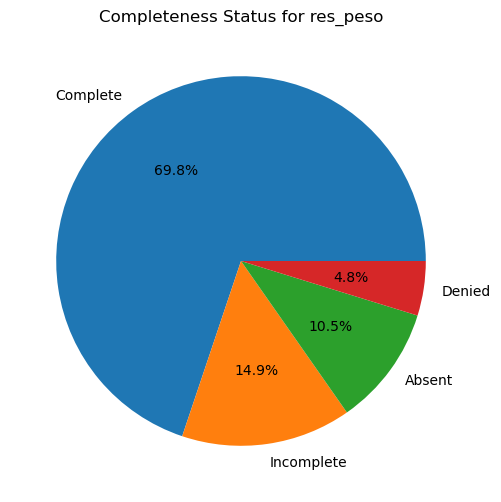

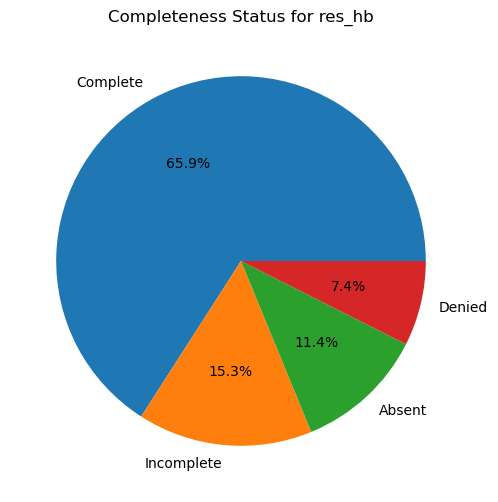

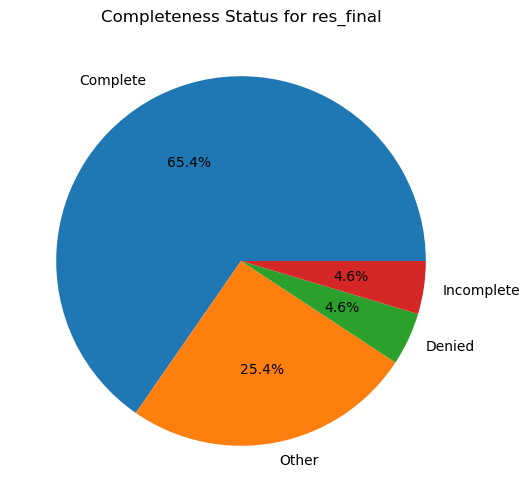

In [8]:
# Define a function to create pie charts for the RES_* columns
def create_pie_chart(column_name):
    # Get the counts of each status
    status_counts = data_001[column_name].value_counts()
    
    # Define the status labels
    status_labels = {
        1: 'Complete',
        2: 'Incomplete',
        3: 'Denied',
        4: 'Absent',
        5: 'Interview not started',
        6: 'Other'
    }
    
    # Get the labels for the present statuses
    present_labels = [status_labels[code] for code in status_counts.index]
    
    # Create the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(status_counts, labels=present_labels, autopct='%1.1f%%')
    plt.title(f'Completeness Status for {column_name}')
    plt.show()

# Create pie charts for RES_PESO, RES_HB, and RES_FINAL
create_pie_chart('res_peso')
create_pie_chart('res_hb')
create_pie_chart('res_final')


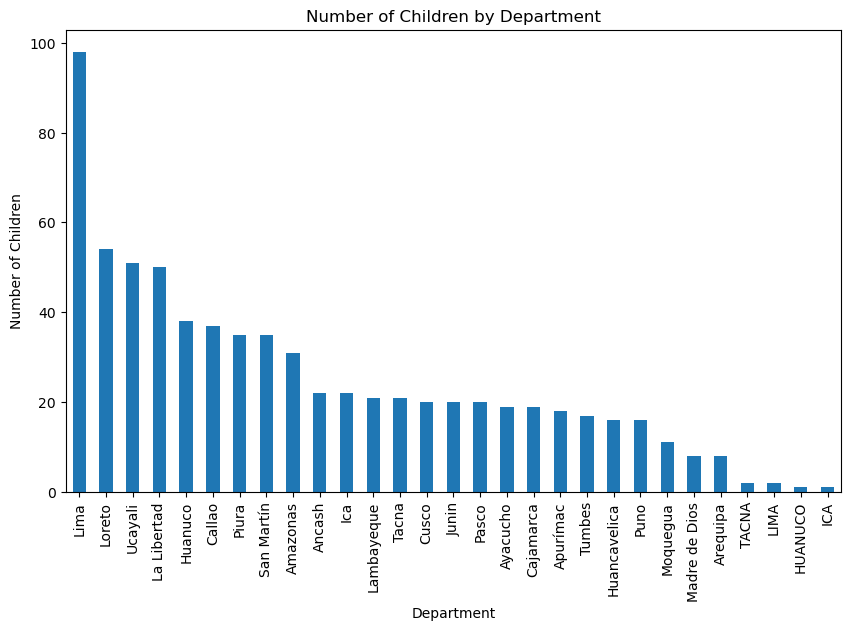

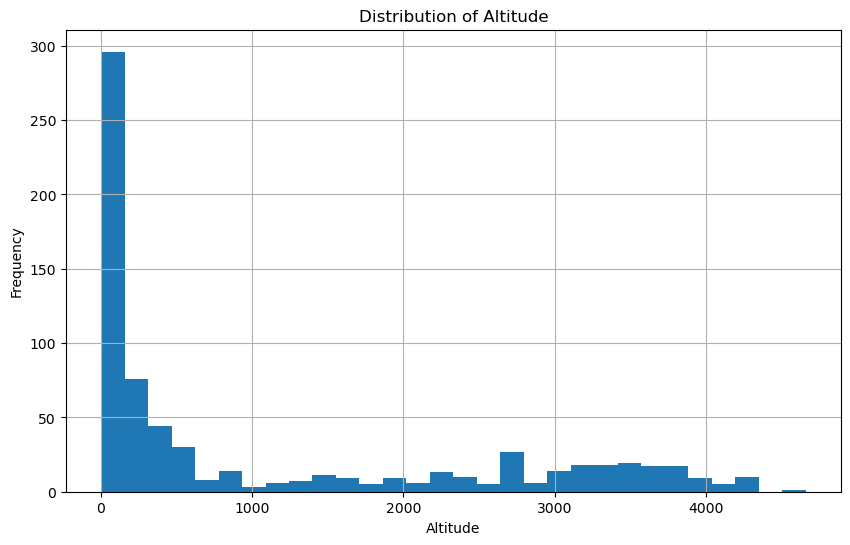

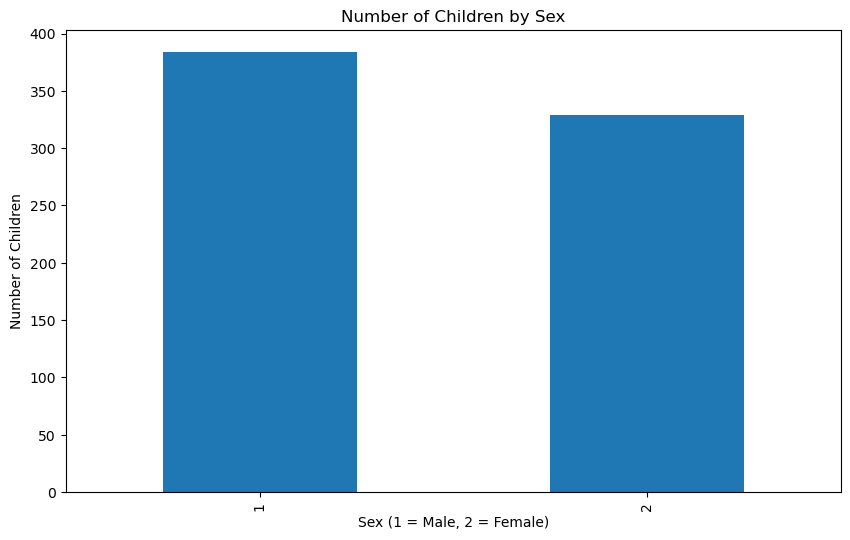

In [9]:
# Bar plot of the number of children by DEPARTAMENTO
plt.figure(figsize=(10, 6))
data_001['departamento'].value_counts().plot(kind='bar')
plt.title('Number of Children by Department')
plt.xlabel('Department')
plt.ylabel('Number of Children')
plt.show()

# Histogram of ALTITUD
plt.figure(figsize=(10, 6))
data_001['altitud'].hist(bins=30)
plt.title('Distribution of Altitude')
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.show()

# Bar plot of the number of children by SEXO
plt.figure(figsize=(10, 6))
data_001['sexo'].value_counts().plot(kind='bar')
plt.title('Number of Children by Sex')
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Number of Children')
plt.show()


## Factor

In [13]:
query2 = 'select conglome, vivienda, id, dominio, departamento, provincia, distrito  from schema_nutri.factor_zona'

In [14]:
data_factor = pd.read_sql_query(query2, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/223541683.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_factor = pd.read_sql_query(query2, conn)


In [15]:
data_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conglome      461 non-null    int64 
 1   vivienda      461 non-null    int64 
 2   id            461 non-null    object
 3   dominio       461 non-null    object
 4   departamento  461 non-null    object
 5   provincia     461 non-null    object
 6   distrito      461 non-null    object
dtypes: int64(2), object(5)
memory usage: 25.3+ KB


In [16]:
# Merge the two dataframes on CONGLOME, VIVIENDA, and ID
merged_data = pd.merge(data_001, data_factor, on=['conglome', 'vivienda', 'id'])

# Check the first few rows of the merged dataframe
merged_data.head()


,conglome,vivienda,id,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,dominio,departamento_y,provincia_y,distrito_y
0,5345,4,3.0,2581,2,Apurímac,ABANCAY,TAMBURCO,1,1,1,1,Resto urbano,APURÍMAC,ABANCAY,TAMBURCO
1,5351,1,6.0,2378,2,Apurímac,ABANCAY,ABANCAY,1,1,1,1,Resto urbano,APURÍMAC,ABANCAY,ABANCAY
2,5384,6,7.0,3075,1,Apurímac,CHINCHEROS,HUACCANA,1,1,1,1,Rural,APURÍMAC,CHINCHEROS,HUACCANA
3,6028,7,3.0,21,2,Callao,CALLAO,VENTANILLA,1,1,1,1,Lima metropolitana,CALLAO,PROV. CONST. DEL CALLAO,VENTANILLA
4,6064,1,4.0,21,1,Callao,CALLAO,VENTANILLA,1,1,1,1,Lima metropolitana,CALLAO,PROV. CONST. DEL CALLAO,VENTANILLA


In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   conglome        461 non-null    int64 
 1   vivienda        461 non-null    int64 
 2   id              461 non-null    object
 3   altitud         461 non-null    int64 
 4   sexo            461 non-null    int64 
 5   departamento_x  461 non-null    object
 6   provincia_x     461 non-null    object
 7   distrito_x      461 non-null    object
 8   res_peso        461 non-null    int64 
 9   res_talla       461 non-null    int64 
 10  res_hb          461 non-null    int64 
 11  res_final       461 non-null    int64 
 12  dominio         461 non-null    object
 13  departamento_y  461 non-null    object
 14  provincia_y     461 non-null    object
 15  distrito_y      461 non-null    object
dtypes: int64(8), object(8)
memory usage: 61.2+ KB


In [30]:
# Define a function to classify each row as 'Urbano' or 'Rural'
def classify_area_type(row):
    if 'urbano' in row or 'Lima metropolitana' in row:
        return 'Urbano'
    else:
        return 'Rural'

# Apply the function to the 'DOMINIO' column
merged_data['Area_Type'] = merged_data['dominio'].apply(classify_area_type)


In [31]:
merged_data.value_counts('Area_Type')

Area_Type
Urbano    249
Rural     212
dtype: int64

In [34]:
#Create the table of conglomerates

# Get the number of evaluated children in each conglomerate
num_evaluated = merged_data['Area_Type'].value_counts()

# Get the number of children in urban and rural areas
num_urban = num_evaluated.loc[num_evaluated.index.str.contains('Urbano')].sum() 
num_rural = num_evaluated.loc[num_evaluated.index.str.contains('Rural')].sum()

# Get the total number of children
num_total = num_evaluated.sum()

# Create the table
conglomerate_table = pd.DataFrame({
    'Urban': num_urban,
    'Rural': num_rural,
    'Total': num_total
}, index=['Number of Evaluated Children'])

conglomerate_table


,Urban,Rural,Total
Number of Evaluated Children,249,212,461


In [18]:
merged_data.departamento_x.value_counts()

Lima             61
Loreto           42
La Libertad      35
Ucayali          31
San Martín       29
Piura            24
Huanuco          23
Callao           23
Amazonas         21
Ica              18
Lambayeque       16
Cusco            14
Ayacucho         13
Ancash           13
Junin            12
Tacna            11
Huancavelica     11
Apurímac         11
Cajamarca        10
Pasco            10
Tumbes            8
Arequipa          7
Puno              7
Moquegua          5
Madre de Dios     4
HUANUCO           1
ICA               1
Name: departamento_x, dtype: int64

- Quitar el y.

In [19]:
merged_data.departamento_x = merged_data.departamento_x.str.capitalize()

In [20]:
merged_data.departamento_x.value_counts()

Lima             61
Loreto           42
La libertad      35
Ucayali          31
San martín       29
Huanuco          24
Piura            24
Callao           23
Amazonas         21
Ica              19
Lambayeque       16
Cusco            14
Ancash           13
Ayacucho         13
Junin            12
Apurímac         11
Huancavelica     11
Tacna            11
Cajamarca        10
Pasco            10
Tumbes            8
Arequipa          7
Puno              7
Moquegua          5
Madre de dios     4
Name: departamento_x, dtype: int64

In [38]:
merged_data.provincia_x.value_counts()

LIMA                      47
CALLAO                    25
MAYNAS                    22
TRUJILLO                  16
PADRE ABAD                13
                          ..
DANIEL ALCIDES CARRION     1
PAITA                      1
PUNO                       1
PICOTA                     1
CONTRALMIRANTE VILLAR      1
Name: provincia_x, Length: 111, dtype: int64

In [39]:
merged_data.distrito_x.value_counts()

VENTANILLA                14
SAN JUAN DE LURIGANCHO    10
CALLERIA                   8
COMAS                      7
RIO SANTIAGO               7
                          ..
FLORENCIA DE MORA          1
HUANCAYO                   1
EL CARMEN                  1
MARCONA                    1
PACHIZA                    1
Name: distrito_x, Length: 222, dtype: int64

<Figure size 1400x800 with 0 Axes>

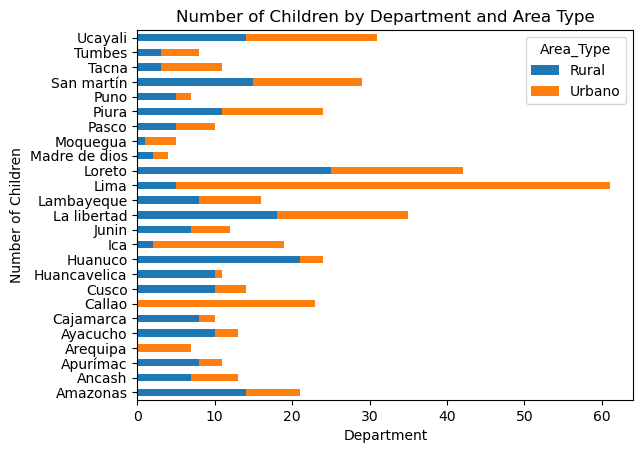

In [37]:
# Bar plot of the number of children by DEPARTAMENTO split by DOMINIO
plt.figure(figsize=(14, 8))
merged_data.groupby(['departamento_x', 'Area_Type']).size().unstack().plot(kind='barh', stacked=True)
plt.title('Number of Children by Department and Area Type')
plt.xlabel('Department')
plt.ylabel('Number of Children')
plt.show()


### Observaciones

- La mezcla de merged data es 001 y factor

- No Habian nas

- 461 es el numero de filas de factor que se tuvo en comun con factor (hay data perdida sin factor de los datos generales)

- Los cambios fueron en uniformizacion de departamento (capitalize)

- Tambien se junto urbano con lima metropolitana en domia con 'Area Type'

- El csv pero esos graficos previos estan listos.

In [49]:
merged_data.to_csv('csv_tableau/data_mergerd_gen_factor.csv', index=False)

## CAP 300 A ANEMIAY 300 SUPLEMENTOS


In [42]:
query3 = 'select conglome, vivienda, id, P314_CONSUME_SUPL  from schema_nutri.suplementos_300'

In [43]:
data_suplementos = pd.read_sql_query(query3, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/2668608282.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_suplementos = pd.read_sql_query(query3, conn)


In [47]:
data_suplementos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   conglome           274 non-null    int64 
 1   vivienda           274 non-null    int64 
 2   id                 274 non-null    object
 3   p314_consume_supl  274 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.7+ KB


In [44]:
query4 = 'select conglome, vivienda, id, P307 from schema_nutri.anemia_300'

In [46]:
data_anemia = pd.read_sql_query(query4, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/584411509.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_anemia = pd.read_sql_query(query4, conn)


In [48]:
data_anemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   conglome  495 non-null    int64 
 1   vivienda  495 non-null    int64 
 2   id        495 non-null    object
 3   p307      495 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.6+ KB


In [51]:
# Merge the supplement and anemia dataframes on CONGLOME, VIVIENDA, and ID
merged_supplements_anemia = pd.merge(data_suplementos, data_anemia, on=['conglome', 'vivienda', 'id'])

# Display the first few rows of the merged dataframe
merged_supplements_anemia.head()


,conglome,vivienda,id,p314_consume_supl,p307
0,8330,15,3.0,2,1
1,8793,47,5.0,2,1
2,6581,82,99.0,2,2
3,8729,67,6.0,2,1
4,6266,86,4.0,2,1


In [52]:
# Merge the supplement and anemia data with the new merged dataset
merged_data_final = pd.merge(merged_data, merged_supplements_anemia, left_on=['conglome', 'vivienda', 'id'], right_on=['conglome', 'vivienda', 'id'])

# Display the first few rows of the final merged dataframe
merged_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 256
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   conglome           257 non-null    int64 
 1   vivienda           257 non-null    int64 
 2   id                 257 non-null    object
 3   altitud            257 non-null    int64 
 4   sexo               257 non-null    int64 
 5   departamento_x     257 non-null    object
 6   provincia_x        257 non-null    object
 7   distrito_x         257 non-null    object
 8   res_peso           257 non-null    int64 
 9   res_talla          257 non-null    int64 
 10  res_hb             257 non-null    int64 
 11  res_final          257 non-null    int64 
 12  dominio            257 non-null    object
 13  departamento_y     257 non-null    object
 14  provincia_y        257 non-null    object
 15  distrito_y         257 non-null    object
 16  Area_Type          257 non-null    object
 1

In [57]:
# Due to the large number of departments, let's only include the top 10 departments with the most children for the next plot
top_departments = merged_data_final['departamento_x'].value_counts().index[:25]

# Filter the dataframe to only include children from the top departments
filtered_data = merged_data_final[merged_data_final['departamento_x'].isin(top_departments)]


In [58]:
department_counts = filtered_data.groupby(['p307', 'departamento_x']).size()
department_counts_group = department_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/3898526839.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  department_counts_group = department_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


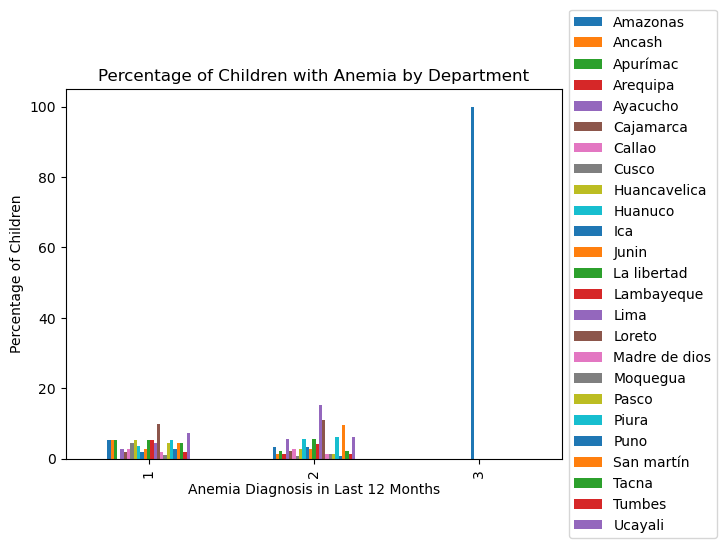

In [62]:
# Department

department_counts_group.unstack().plot(kind='bar')
plt.title('Percentage of Children with Anemia by Department')
plt.xlabel('Anemia Diagnosis in Last 12 Months')
plt.ylabel('Percentage of Children')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

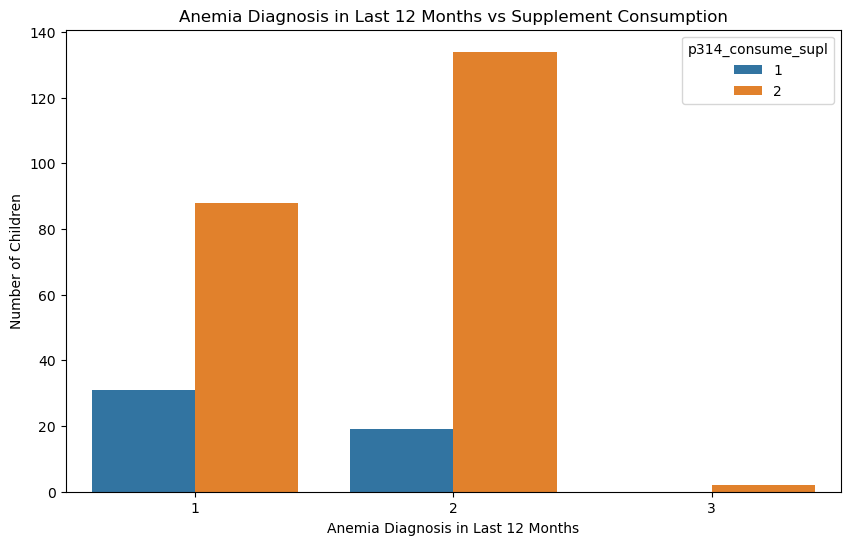

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_supplements_anemia, x='p307', hue='P314_CONSUME_SUPL'.lower())
plt.title('Anemia Diagnosis in Last 12 Months vs Supplement Consumption')
plt.xlabel('Anemia Diagnosis in Last 12 Months')
plt.ylabel('Number of Children')
plt.show()

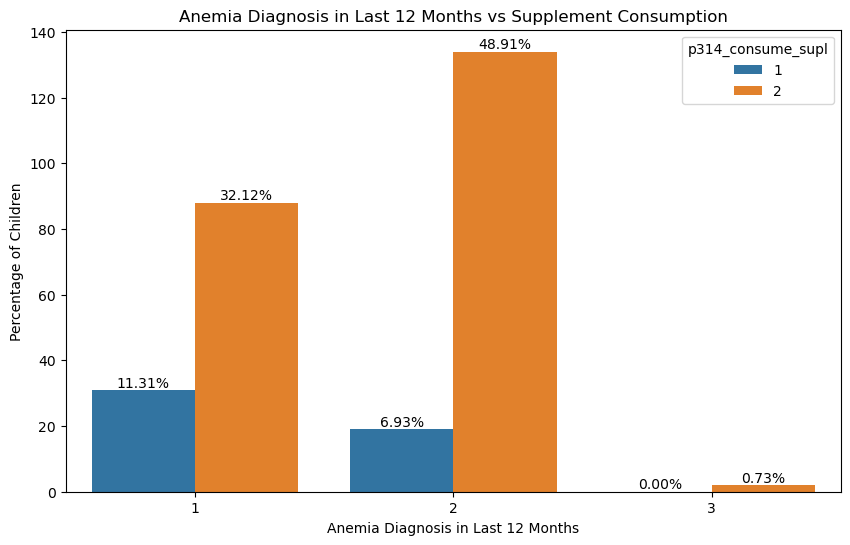

In [66]:
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=merged_supplements_anemia, x='p307', hue='P314_CONSUME_SUPL'.lower())

# Calcular los porcentajes
total = len(merged_supplements_anemia)  # Total de observaciones
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.title('Anemia Diagnosis in Last 12 Months vs Supplement Consumption')
plt.xlabel('Anemia Diagnosis in Last 12 Months')
plt.ylabel('Percentage of Children')

plt.show()
